In [33]:
import os
import dask
import dask_image.imread
import matplotlib.pyplot as plt
import math

In [41]:
Images = dask_image.imread.imread(os.path.join('img', '*.jpg'))

In [42]:
Images

,Array,Chunk
Bytes,1.50 GiB,34.88 MiB
Shape,"(44, 3024, 4032, 3)","(1, 3024, 4032, 3)"
Count,132 Tasks,44 Chunks
Type,uint8,numpy.ndarray


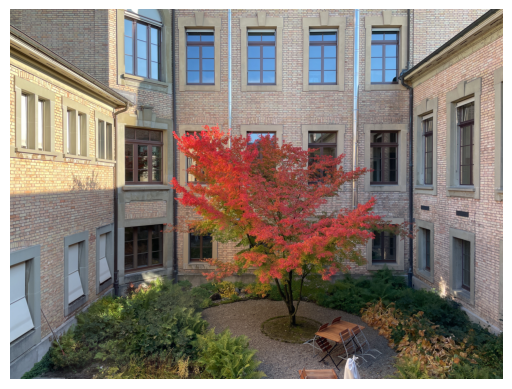

In [43]:
plt.imshow(Images[0])
plt.axis('off')
plt.show()

In [70]:
Images.shape

(44, 3024, 4032, 3)

In [68]:
Images.shape[1] / len(Images)

68.72727272727273

In [69]:
Images.shape[2] / len(Images)

91.63636363636364

In [45]:
TimeSlice =  dask.array.zeros_like(Images[0])

In [74]:
# Make a vertical timeslice
stepwidth = math.floor(Images.shape[2] / len(Images))
TimeSlice_Vertical =  dask.array.zeros_like(Images[0])
for c, image in enumerate(Images):
    TimeSlice_Vertical[:,c*stepwidth:(c+1)*stepwidth] = image[:,c*stepwidth:(c+1)*stepwidth]
    # plt.subplot(121)
    # plt.imshow(TimeSlice_Vertical)
    # plt.axis('off')
    # plt.title(c)
    # plt.subplot(122)
    # plt.imshow(image)
    # plt.fill_betweenx(range(image.shape[0]),
    #                  c*stepwidth,
    #                  (c+1)*stepwidth,
    #                  alpha=0.5)
    # plt.axis('off')
    # plt.show()

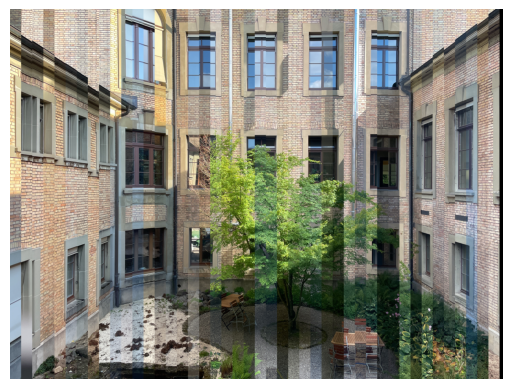

In [75]:
plt.imshow(TimeSlice_Vertical)
plt.axis('off')
plt.show()

In [76]:
# Make a horizontal timeslice
TimeSlice_Horizontal =  dask.array.zeros_like(Images[0])
stepheight = math.floor(Images.shape[1] / len(Images))
for c, image in enumerate(Images):
    TimeSlice_Horizontal[c*stepheight:(c+1)*stepheight] = image[c*stepheight:(c+1)*stepheight]    
    # plt.subplot(121)
    # plt.imshow(TimeSlice)
    # plt.axis('off')
    # plt.title(c)
    # plt.subplot(122)
    # plt.imshow(image)
    # plt.fill_between(range(image.shape[1]),
    #                  c*stepheight,
    #                  (c+1)*stepheight,
    #                  alpha=0.5)
    # plt.axis('off')
    # plt.show()

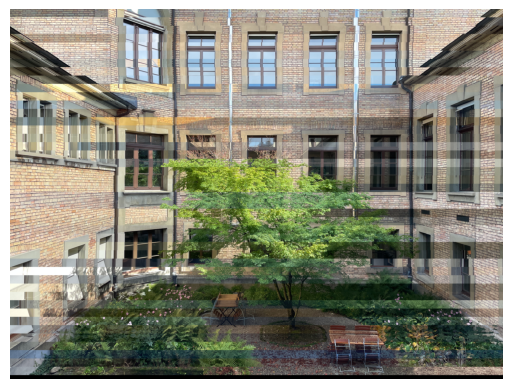

In [77]:
plt.imshow(TimeSlice_Horizontal)
plt.axis('off')
plt.show()